### In this code you will find:

The comparison and analyst of minimum distance of knickpoints for watesheds using in this study.
For Analyst we used T- students statistic for value groups.

In [1]:
#import libreries
# -*- coding: utf-8 -*-
import seaborn as sns #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pylab as plb
import scipy
%matplotlib inline
#import geopandas as gpd
import pylab
#t-test for dependent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
from math import log10

#### Insert data

In [2]:
#Insert table
#df = pd.read_excel(r'D:\Documents\Recursos_hidricos\TESIS\XLS\Analisis_v2_19_07_02\Analisis_E_W_8k.xlsx', sheet_name='sin_sin')
df = pd.read_excel(r'D:\Documents\Recursos_hidricos\TESIS\XLS\Analisis_v2_19_07_02\Analisis_E_W.xlsx', sheet_name='python_21_04')
df.describe()

,Grupo,DKp E,DKp W,VOKp E,VOKp W,SKp E,SKp W,MECh E,MECh W,DMKsn E,DMKsn W,LON,LAT
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,28.295455,4.069798,4.071727,90.709555,79.413272,0.155862,0.126748,1079.875105,1041.278063,3.860389,4.013512,-72.402640,-42.728617
std,15.887072,2.271209,1.714510,49.243930,62.817631,0.088293,0.064253,272.999519,302.544878,3.281557,2.135025,0.572219,2.408292
min,2.000000,0.724158,1.065228,28.189295,20.190580,0.050859,0.030780,519.142612,496.423079,0.421897,0.794775,-73.558054,-46.458468
25%,15.750000,2.399625,2.796931,57.675419,41.810247,0.100862,0.082262,856.812125,813.489853,1.283255,2.130399,-72.832308,-44.803079
50%,28.500000,3.542533,3.587199,81.125996,59.368279,0.130230,0.111279,1069.570393,1027.994728,3.000473,3.534688,-72.388983,-43.225437
75%,41.250000,4.708212,5.024140,102.954381,82.228435,0.189717,0.152948,1251.348409,1248.499998,5.316377,5.697579,-71.949856,-40.110530
max,57.000000,11.130284,8.686712,247.537154,323.034570,0.420273,0.346272,1594.210741,1692.713614,14.727468,8.467359,-71.385226,-38.635755


#### Calculate dimensionless coefficients between the slopes right and left

In [3]:
rel = pd.DataFrame()
rel['Grupo'] = df['Grupo']
rel['DKp'] = df['DKp E'] / df['DKp W']
rel['VOKp'] = df['VOKp E']  / df['VOKp W']  
rel['SKp'] = df['SKp E']  / df['SKp W']  
rel['MECh'] = df['MECh E']  / df['MECh W']  
rel['DMKsn'] = df['DMKsn E']  / df['DMKsn W']
#rel['EKp'] = df['EKp E'] / df['EKp W']
rel['LON'] = df['LON']
rel['LAT'] = df['LAT']

#rel = rel.drop(rel.index[51]) #Error ¿?

#export data
rel.to_excel("relatios.xlsx")

#descriptive statistics 
rel.describe()

,Grupo,DKp,VOKp,SKp,MECh,DMKsn,LON,LAT
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,28.295455,1.072561,1.481766,1.384147,1.093597,1.581615,-72.402640,-42.728617
std,15.887072,0.573113,0.827949,0.888727,0.387623,2.566008,0.572219,2.408292
min,2.000000,0.266706,0.313084,0.463260,0.485009,0.066136,-73.558054,-46.458468
25%,15.750000,0.729910,0.914129,0.803465,0.896812,0.283133,-72.832308,-44.803079
50%,28.500000,0.946328,1.396361,1.113266,1.047483,0.920901,-72.388983,-43.225437
75%,41.250000,1.300864,1.852145,1.708397,1.176707,2.190517,-71.949856,-40.110530
max,57.000000,3.050274,4.116786,5.077864,3.122692,16.408381,-71.385226,-38.635755


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

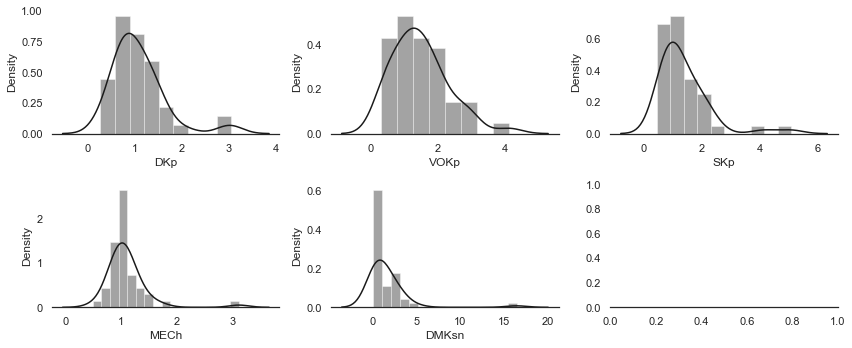

In [4]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f1, axes = plt.subplots(2, 3, figsize=(12, 5))
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(rel['DKp'], color="k", ax=axes[0, 0])
sns.distplot(rel['VOKp'], color="k", ax=axes[0, 1])
sns.distplot(rel['SKp'], color="k", ax=axes[0, 2])
sns.distplot(rel['MECh'], color="k", ax=axes[1, 0])
sns.distplot(rel['DMKsn'], color="k", ax=axes[1, 1])


#plt.setp(axes, yticks=[])
plt.tight_layout()

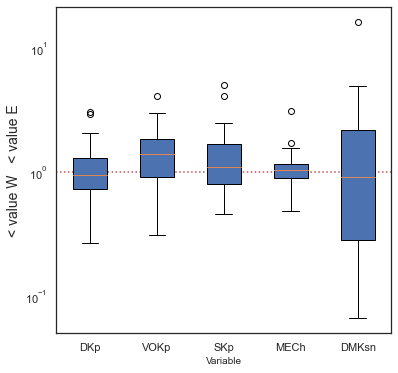

In [5]:
fig2 = plt.subplots(figsize=(6,6))
sns.set(style= 'white')
DKp = rel['DKp']
VOKp = rel['VOKp']
SKp = rel['SKp']
MECh = rel['MECh']
DMKsn = rel['DMKsn']
labels = ['DKp', 'VOKp', 'SKp', 'MECh', 'DMKsn']
az = plt.subplot(1,1,1)
az.boxplot([DKp,VOKp,SKp,MECh,DMKsn],
           vert=True,  # vertical box alignment
           patch_artist=True,
           labels = labels)  # will be used to label x-ticks
az.set_yscale("log")
az.set_ylabel('< value W   < value E', fontsize=14
             )
az.set_xlabel('Variable', fontsize=10)

constantx = plt.axhline(1, color='r', ls="dotted",label='Balance')

#### Correlations and comparisons between Variables dimensionless coefficients 

In [6]:
corr = rel.corr()
corr.drop(['Grupo', 'LON', 'LAT'], axis='columns', inplace=True)
corr.drop(['Grupo','LON', 'LAT'],axis='rows', inplace=True )
corr

,DKp,VOKp,SKp,MECh,DMKsn
DKp,1.000000,0.066108,-0.399857,0.399796,0.459780
VOKp,0.066108,1.000000,0.390573,0.169715,0.018934
SKp,-0.399857,0.390573,1.000000,0.054149,-0.273534
MECh,0.399796,0.169715,0.054149,1.000000,0.744113
DMKsn,0.459780,0.018934,-0.273534,0.744113,1.000000


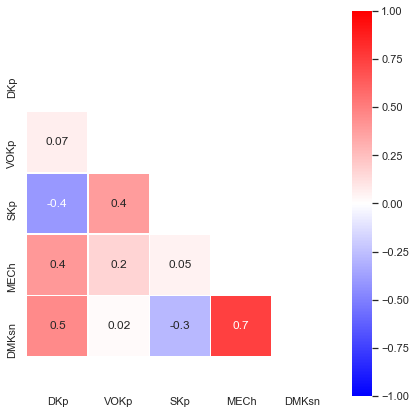

In [7]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="bwr", ax=ax, vmin=-1, vmax=1, mask=mask, square=True,
                linewidths = .5,
               annot = True, annot_kws = {'size': 12},
               fmt='.1g')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.savefig("matriz_variables.png", dpi=500)

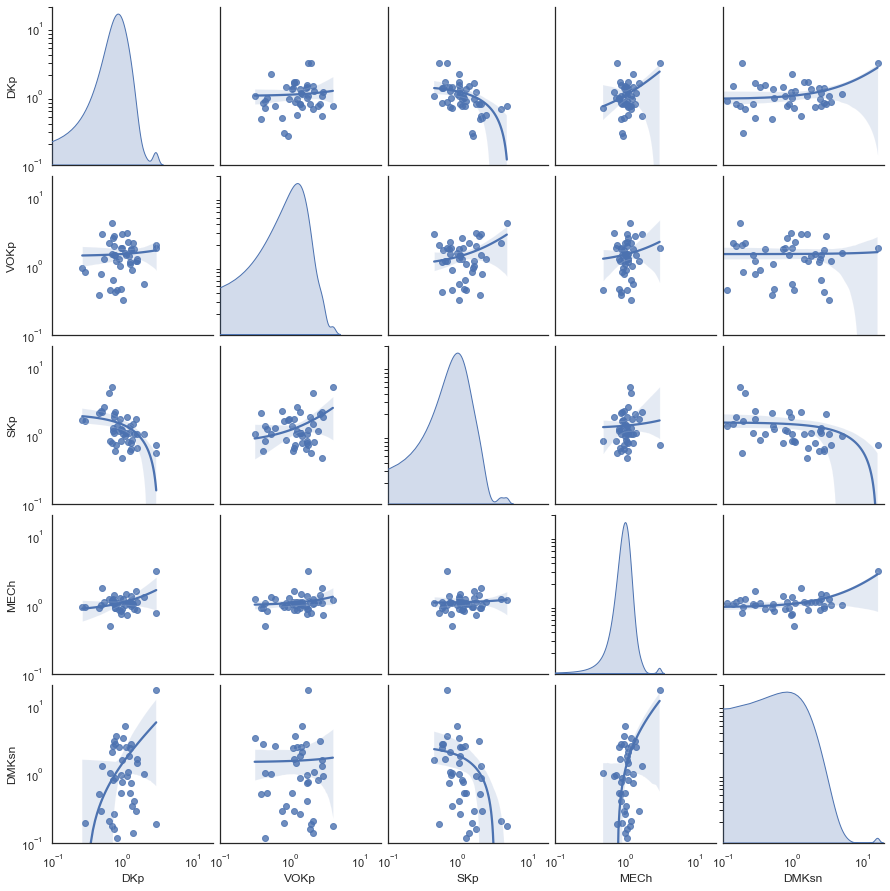

In [8]:
fig3 = sns.pairplot(rel,
             vars=['DKp', 'VOKp', 'SKp', 'MECh', 'DMKsn'],
            diag_kind="kde",
            kind="reg")
fig3.set(xscale="log")
fig3.set(yscale="log")
fig3.set(xlim=(0.1,20))
fig3.set(ylim=(0.1,20))


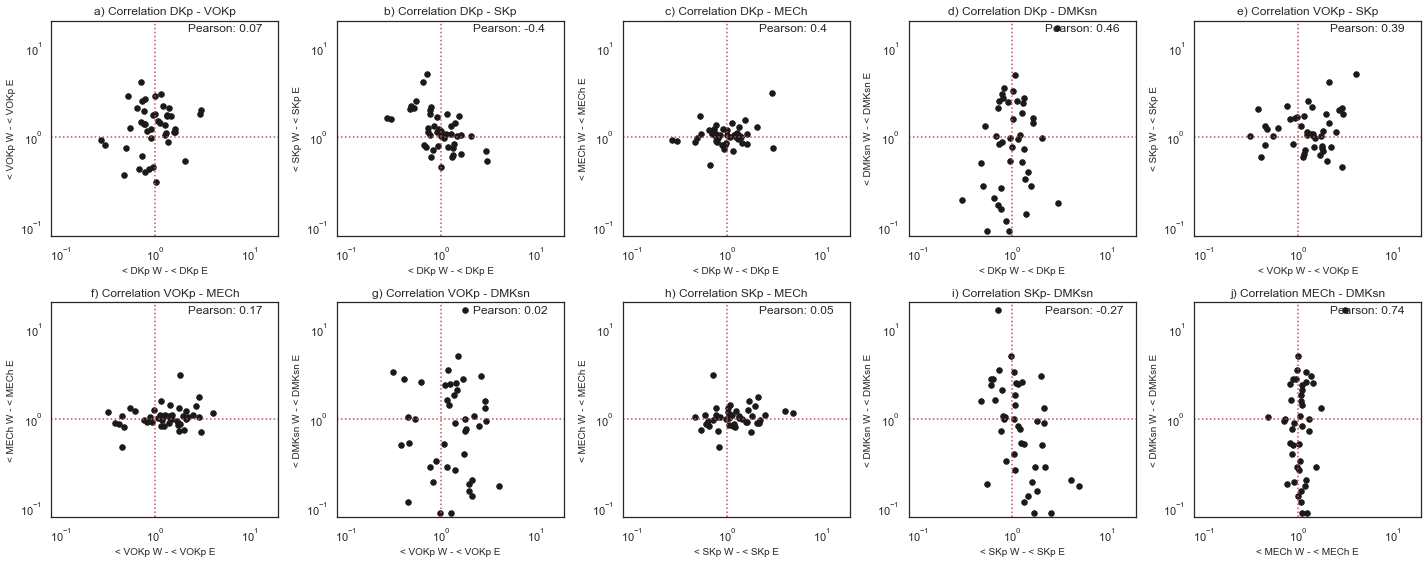

In [9]:
fig = plt.subplots(figsize=(20,8)) 

#Correlation DKp - VOKp
a1 = plt.subplot(2,5,1)
a1.scatter(rel['DKp'], rel['VOKp'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a1.set_xscale("log")
a1.set_yscale("log")
a1.set_xlabel('< DKp W - < DKp E', fontsize=10)
a1.set_ylabel('< VOKp W - < VOKp E', fontsize=10)
plt.title("a) Correlation DKp - VOKp")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr1= rel['DKp'].corr(rel['VOKp'])
plt.annotate("Pearson: "+str(round(corr1,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation DKp - SKp
a2 = plt.subplot(2,5,2)

a2.scatter(rel['DKp'], rel['SKp'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a2.set_xscale("log")
a2.set_yscale("log")
a2.set_xlabel('< DKp W - < DKp E', fontsize=10)
a2.set_ylabel('< SKp W - < SKp E', fontsize=10)
plt.title("b) Correlation DKp - SKp")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr2= rel['DKp'].corr(rel['SKp'])
plt.annotate("Pearson: "+str(round(corr2,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation DKp - MECh
a3 = plt.subplot(2,5,3)

a3.scatter(rel['DKp'], rel['MECh'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a3.set_xscale("log")
a3.set_yscale("log")
a3.set_xlabel('< DKp W - < DKp E', fontsize=10)
a3.set_ylabel('< MECh W - < MECh E', fontsize=10)
plt.title("c) Correlation DKp - MECh")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr3= rel['DKp'].corr(rel['MECh'])
plt.annotate("Pearson: "+str(round(corr3,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation DKp - DMKsn
a4 = plt.subplot(2,5,4)

a4.scatter(rel['DKp'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a4.set_xscale("log")
a4.set_yscale("log")
a4.set_xlabel('< DKp W - < DKp E', fontsize=10)
a4.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("d) Correlation DKp - DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr4= rel['DKp'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr4,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation VOKp - SKp
a5 = plt.subplot(2,5,5)

a5.scatter(rel['VOKp'], rel['SKp'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a5.set_xscale("log")
a5.set_yscale("log")
a5.set_xlabel('< VOKp W - < VOKp E', fontsize=10)
a5.set_ylabel('< SKp W - < SKp E', fontsize=10)
plt.title("e) Correlation VOKp - SKp")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr5 = rel['VOKp'].corr(rel['SKp'])
plt.annotate("Pearson: "+str(round(corr5,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation VOKp - MECh
a6 = plt.subplot(2,5,6)

a6.scatter(rel['VOKp'], rel['MECh'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a6.set_xscale("log")
a6.set_yscale("log")
a6.set_xlabel('< VOKp W - < VOKp E', fontsize=10)
a6.set_ylabel('< MECh W - < MECh E', fontsize=10)
plt.title("f) Correlation VOKp - MECh")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr6 = rel['VOKp'].corr(rel['MECh'])
plt.annotate("Pearson: "+str(round(corr6,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation VOKp - DMKsn
a7 = plt.subplot(2,5,7)

a7.scatter(rel['VOKp'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a7.set_xscale("log")
a7.set_yscale("log")
a7.set_xlabel('< VOKp W - < VOKp E', fontsize=10)
a7.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("g) Correlation VOKp - DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr7= rel['VOKp'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr7,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation SKp - MECh
a8 = plt.subplot(2,5,8)

a8.scatter(rel['SKp'], rel['MECh'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a8.set_xscale("log")
a8.set_yscale("log")
a8.set_xlabel('< SKp W - < SKp E', fontsize=10)
a8.set_ylabel('< MECh W - < MECh E', fontsize=10)
plt.title("h) Correlation SKp - MECh")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr8 = rel['SKp'].corr(rel['MECh'])
plt.annotate("Pearson: "+str(round(corr8,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation SKp - DMKsn
a9 = plt.subplot(2,5,9)

a9.scatter(rel['SKp'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a9.set_xscale("log")
a9.set_yscale("log")
a9.set_xlabel('< SKp W - < SKp E', fontsize=10)
a9.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("i) Correlation SKp- DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr9 = rel['SKp'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr9,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation MECh - DMKsn
a10 = plt.subplot(2,5,10)

a10.scatter(rel['MECh'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a10.set_xscale("log")
a10.set_yscale("log")
a10.set_xlabel('< MECh W - < MECh E', fontsize=10)
a10.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("j) Correlation MECh - DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr10 = rel['MECh'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr10,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);

plt.tight_layout()

<ipython-input-11-643b202fbee3>:126: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('result_dispersion.png', DPI=500)


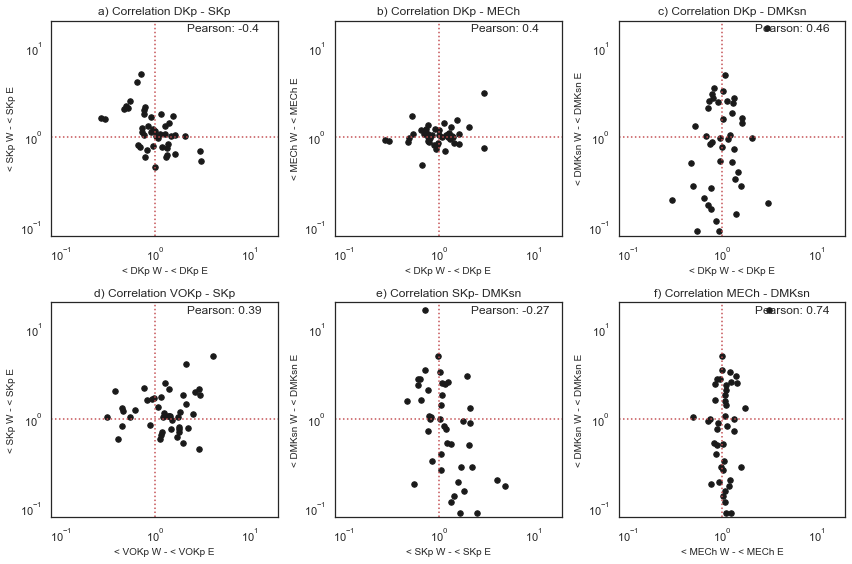

In [11]:
fig = plt.subplots(figsize=(12,8)) 

#Correlation DKp - VOKp

#Correlation DKp - SKp
a2 = plt.subplot(2,3,1)

a2.scatter(rel['DKp'], rel['SKp'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a2.set_xscale("log")
a2.set_yscale("log")
a2.set_xlabel('< DKp W - < DKp E', fontsize=10)
a2.set_ylabel('< SKp W - < SKp E', fontsize=10)
plt.title("a) Correlation DKp - SKp")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr2= rel['DKp'].corr(rel['SKp'])
plt.annotate("Pearson: "+str(round(corr2,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation DKp - MECh
a3 = plt.subplot(2,3,2)

a3.scatter(rel['DKp'], rel['MECh'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a3.set_xscale("log")
a3.set_yscale("log")
a3.set_xlabel('< DKp W - < DKp E', fontsize=10)
a3.set_ylabel('< MECh W - < MECh E', fontsize=10)
plt.title("b) Correlation DKp - MECh")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr3= rel['DKp'].corr(rel['MECh'])
plt.annotate("Pearson: "+str(round(corr3,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation DKp - DMKsn
a4 = plt.subplot(2,3,3)

a4.scatter(rel['DKp'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a4.set_xscale("log")
a4.set_yscale("log")
a4.set_xlabel('< DKp W - < DKp E', fontsize=10)
a4.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("c) Correlation DKp - DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr4= rel['DKp'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr4,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation VOKp - SKp
a5 = plt.subplot(2,3,4)

a5.scatter(rel['VOKp'], rel['SKp'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a5.set_xscale("log")
a5.set_yscale("log")
a5.set_xlabel('< VOKp W - < VOKp E', fontsize=10)
a5.set_ylabel('< SKp W - < SKp E', fontsize=10)
plt.title("d) Correlation VOKp - SKp")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr5 = rel['VOKp'].corr(rel['SKp'])
plt.annotate("Pearson: "+str(round(corr5,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation VOKp - MECh

#Correlation VOKp - DMKsn

#Correlation SKp - MECh

#Correlation SKp - DMKsn
a9 = plt.subplot(2,3,5)

a9.scatter(rel['SKp'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a9.set_xscale("log")
a9.set_yscale("log")
a9.set_xlabel('< SKp W - < SKp E', fontsize=10)
a9.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("e) Correlation SKp- DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr9 = rel['SKp'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr9,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);


#Correlation MECh - DMKsn
a10 = plt.subplot(2,3,6)

a10.scatter(rel['MECh'], rel['DMKsn'], c= "k", edgecolors="k",s=30) #, facecolor=(0, 0, 0), ,s=30 
a10.set_xscale("log")
a10.set_yscale("log")
a10.set_xlabel('< MECh W - < MECh E', fontsize=10)
a10.set_ylabel('< DMKsn W - < DMKsn E', fontsize=10)
plt.title("f) Correlation MECh - DMKsn")
plt.xlim(0.08,20)
plt.ylim(0.08,20)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')
constanty = plt.axhline(1, color='r', ls="dotted",label='Balance')

corr10 = rel['MECh'].corr(rel['DMKsn'])
plt.annotate("Pearson: "+str(round(corr10,2)), (0.6, 0.95), xycoords='axes fraction',fontsize=12);

plt.tight_layout()

plt.savefig('result_dispersion.png', DPI=500)

**relationship with latitude and longitude**

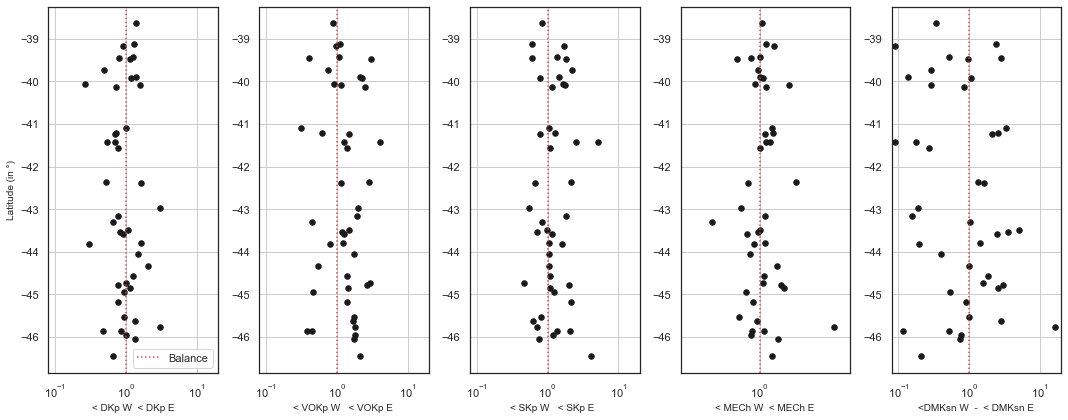

In [12]:
['DKp', 'VOKp', 'SKp', 'MECh', 'DMKsn'],

#Figures latitude
fig4 = plt.subplots(figsize=(15,6))
sns.set(style= 'white')


#correlation DKp - latitude
ax1 = plt.subplot(1,5,1)

ax1.scatter(rel.DKp, rel.LAT, c="k", edgecolors="k",s=30)
ax1.set_xscale("log")
ax1.set_xlabel('< DKp W  < DKp E', fontsize=10)
ax1.set_ylabel('Latitude (in °)', fontsize=10)

ax1.grid(True)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')

plt.legend(handles=[constantx])
plt.xlim(0.08,20)


#correlation dz - latitude
ax2 = plt.subplot(1,5,2)

ax2.scatter(rel.VOKp, rel.LAT, c="k", edgecolors="k",s=30)
ax2.set_xscale("log")
ax2.set_xlabel('< VOKp W   < VOKp E ', fontsize=10)

ax2.grid(True)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')

plt.xlim(0.08,20)


#correlation SKp - latitude
ax3 = plt.subplot(1,5,3)

ax3.scatter(rel.SKp, rel.LAT, c="k", edgecolors="k",s=30)
ax3.set_xscale("log")
ax3.set_xlabel('< SKp W   < SKp E  ', fontsize=10)

ax3.grid(True)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')

plt.xlim(0.08,20)


#correlation MECh - latitude
ax3 = plt.subplot(1,5,4)

ax3.scatter(rel.MECh, rel.LAT, c="k", edgecolors="k",s=30)
ax3.set_xscale("log")
ax3.set_xlabel('< MECh W  < MECh E ', fontsize=10)

ax3.grid(True)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')

plt.xlim(0.3,4)


#correlation ksnd - latitude
ax3 = plt.subplot(1,5,5)

ax3.scatter(rel.DMKsn, rel.LAT, c="k", edgecolors="k",s=30)
ax3.set_xscale("log")
ax3.set_xlabel('<DMKsn W  -  < DMKsn E', fontsize=10)

ax3.grid(True)

constantx = plt.axvline(1, color='r', ls="dotted",label='Balance')

plt.xlim(0.08,20)

plt.tight_layout()



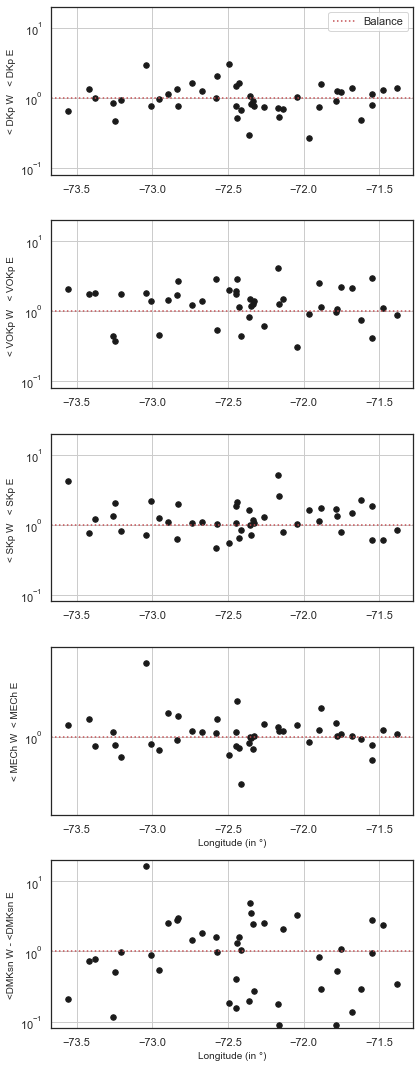

In [13]:
#Figures Longitude

['DKp', 'VOKp', 'SKp', 'MECh', 'DMKsn'],

fig2 = plt.subplots(figsize=(6,15))
sns.set(style= 'white')

#correlation DKp - longitude
ax1 = plt.subplot(5,1,1)

ax1.scatter(rel.LON,rel.DKp, c="k", edgecolors="k",s=30)
ax1.set_yscale("log")
ax1.set_ylabel('< DKp W   < DKp E', fontsize=10)

ax1.grid(True)

constantx = plt.axhline(1, color='r', ls="dotted",label='Balance')

plt.legend(handles=[constantx])
plt.ylim(0.08,20)

#correlation VOKp - longitude
ax1 = plt.subplot(5,1,2)

ax1.scatter(rel.LON, rel.VOKp, c="k", edgecolors="k",s=30)
ax1.set_yscale("log")
ax1.set_ylabel('< VOKp W   < VOKp E ', fontsize=10)

ax1.grid(True)

constantx = plt.axhline(1, color='r', ls="dotted",label='Balance')

plt.ylim(0.08,20)

#correlation hmax - longitude
ax1 = plt.subplot(5,1,3)

ax1.scatter(rel.LON, rel.SKp, c="k", edgecolors="k",s=30)
ax1.set_yscale("log")
ax1.set_ylabel('< SKp W   < SKp E ', fontsize=10)

ax1.grid(True)

constantx = plt.axhline(1, color='r', ls="dotted",label='Balance')

plt.ylim(0.08,20)

#correlation MECh - longitude
ax1 = plt.subplot(5,1,4)

ax1.scatter(rel.LON, rel.MECh, c="k", edgecolors="k",s=30)
ax1.set_yscale("log")
ax1.set_ylabel('< MECh W  < MECh E', fontsize=10)
ax1.set_xlabel('Longitude (in °)', fontsize=10)

ax1.grid(True)

constantx = plt.axhline(1, color='r', ls="dotted",label='Balance')

plt.ylim(0.3,4)


#correlation DMKsn - longitude
ax1 = plt.subplot(5,1,5)

ax1.scatter(rel.LON, rel.DMKsn, c="k", edgecolors="k",s=30)
ax1.set_yscale("log")
ax1.set_ylabel('<DMKsn W - <DMKsn E', fontsize=10)
ax1.set_xlabel('Longitude (in °)', fontsize=10)

ax1.grid(True)

constantx = plt.axhline(1, color='r', ls="dotted",label='Balance')

plt.ylim(0.08,20)

plt.tight_layout()